In [1]:
#Kerasを動かすバックエンド
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras as ks

Using Theano backend.
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\81801\anaconda3\envs\py36\lib\site-packages\t

In [2]:
#Kerasの必要なコンポーネントをインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
#データを高速かつ効率的に使えるPandasをインポート
import pandas as pd
#数値計算を効率的に行うnumpyをインポート
import numpy as np

In [4]:
#グラフが簡単に描写できるMatplotlibをインポート
import matplotlib
import matplotlib.pyplot as plt

In [5]:
#各モジュールをインポート
import cv2
import copy
import os
import glob

In [6]:
path='./data/gakusyuu'
imgs=[]
labels=[]
f_=[0,0,0,0]
dirs = os.listdir(path)
dir_list = [f for f in dirs if os.path.isdir(os.path.join(path, f))]
for label in dir_list:
    file=glob.glob(path+"/"+label+"/*")
    temp=copy.copy(f_)
    temp[int(label)]=1
    
    for img_path in file:
        img_path=img_path
        img=cv2.imread(img_path,0)
        img=img[:, :, np.newaxis]
        imgs.append(img)
        labels.append(temp)
        #print(img_path)
        #print(np.shape(img))
        
X_train=np.asarray(imgs)
y_train=np.asarray(labels)

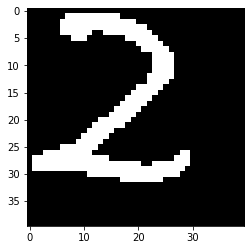

In [7]:
%matplotlib inline 
plt.imshow(X_train[1946].reshape(40,40),cmap = "gray")
plt.show()

In [8]:
y_train[1946]

array([1, 0, 0, 0])

In [9]:
path='./data/test'
imgs=[]
labels=[]
cnt=0
f_=[0,0,0,0]
file=glob.glob(path+"/*")
for img_path in file:
    temp=copy.copy(f_)
    if cnt>3:
        cnt-=4
    temp[cnt]=1
    cnt+=1
    img_path=img_path
    img=cv2.imread(img_path,0)
    img=img[:, :, np.newaxis]
    imgs.append(img)
    labels.append(temp)
    #print(img_path)
    #print(np.shape(img))
        
X_test=np.asarray(imgs)
y_test=np.asarray(labels)

In [10]:
print(X_train.shape)
print(y_train.shape)

(20000, 40, 40, 1)
(20000, 4)


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [12]:
X_train /= 255
X_test /= 255

In [13]:
np.shape(X_train)

(20000, 40, 40, 1)

In [14]:
np.shape(X_test)

(19080, 40, 40, 1)

In [15]:
np.shape(y_train)

(20000, 4)

In [16]:
np.shape(y_test)

(19080, 4)

In [17]:
# モデルの宣言
model = Sequential()

In [18]:
# 先に作成したmodelへレイヤーを追加
import theano.ifelse
model.add(Conv2D(32, 3, 3,
                 activation='relu',
                 input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

C:\Users\81801\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(40, 40, 1...)`
  """


In [40]:
# Learnig Processの設定
model.compile(loss='categorical_crossentropy',
optimizer = 'adam',
metrics=['accuracy'])

In [28]:
# モデル生成（エポック ２０）
history=model.fit(X_train, y_train, nb_epoch=5, validation_data = (X_train, y_train))

C:\Users\81801\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 20000 samples, validate on 20000 samples
Epoch 1/5
20000/20000 [==============================] - 98s 5ms/step - loss: 0.1156 - accuracy: 0.9600 - val_loss: 0.0287 - val_accuracy: 0.9915
Epoch 2/5
20000/20000 [==============================] - 142s 7ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0120 - val_accuracy: 0.9964
Epoch 3/5
20000/20000 [==============================] - 138s 7ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0074 - val_accuracy: 0.9980
Epoch 4/5
20000/20000 [==============================] - 138s 7ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0048 - val_accuracy: 0.9984
Epoch 5/5
20000/20000 [==============================] - 140s 7ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 5.5654e-04 - val_accuracy: 0.9999


In [29]:
# テストデータを使ってモデルの評価
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
print(loss_and_metrics)

19080/19080 [==============================] - 26s 1ms/step
[0.02019904836911518, 0.9946016669273376]


In [30]:
#モデルの保存
result_dir='./data/result_adam_batch'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
model.save_weights(os.path.join(result_dir,'weight.h5'))
model.save(os.path.join(result_dir,'model.h5'))

In [31]:
#データ抽出 (正解率)
acc=copy.copy(history.history["accuracy"])
acc.insert(0,0)
val_acc=copy.copy(history.history["val_accuracy"])
val_acc.insert(0,0)
print(acc)
print(val_acc)

[0, array(0.96, dtype=float32), array(0.9924, dtype=float32), array(0.99665, dtype=float32), array(0.9982, dtype=float32), array(0.99865, dtype=float32)]
[0, 0.9915000200271606, 0.996399998664856, 0.9980499744415283, 0.9983999729156494, 0.9999499917030334]


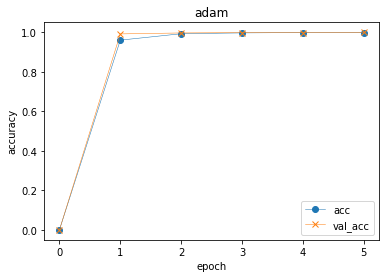

In [32]:
# 学習結果の描写 (正解率)
import matplotlib.pyplot as plt
import copy
#acc,val_accのプロット
plt.plot(acc, lw=0.5,label="acc", ls="-", marker="o")
plt.plot(val_acc,lw=0.5, label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("adam")
plt.legend(loc="best")
#学習曲線の保存
plt.savefig(result_dir+'/sgd_acc.png')
plt.show()

In [33]:
#データ抽出 (損失)
loss=copy.copy(history.history["loss"])
loss.insert(0,0)
val_loss=copy.copy(history.history["val_loss"])
val_loss.insert(0,0)
print(loss)
print(val_loss)

[0, 0.1155814980937168, 0.023908192860800773, 0.011114609159529209, 0.005467546498253068, 0.003975628043181496]
[0, 0.028700580432472634, 0.012032584020869763, 0.007376940909948917, 0.004787071093042937, 0.000556539823641765]


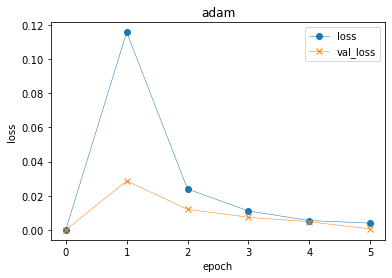

In [34]:
# 学習結果の描写 (損失)
import matplotlib.pyplot as plt
import copy
#loss,val_lossのプロット
plt.plot(loss, lw=0.5,label="loss", ls="-", marker="o")
plt.plot(val_loss,lw=0.5, label="val_loss", ls="-", marker="x")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("adam")
plt.legend(loc="best")
#学習曲線の保存
plt.savefig(result_dir+'/sgd_loss.png')
plt.show()

In [78]:
# X_testを使って予測を行う

predictions = model.predict_classes(X_test)
x = list(predictions)
def if_test(y_test):
if y_test==[1, 0, 0, 0]:'2'
    else if  y_test==[0, 1, 0, 0]:'4'
         else if  y_test==[0, 0, 1, 0]:'7'
                 else: '9'
y = list(y_test)
results = pd.DataFrame({'Actual': y, 'Predictions': x})
results[i]
plt.imshow(.reshape(40,40),cmap = "gray")

IndentationError: expected an indented block (<ipython-input-78-9be7d9ce0f3f>, line 6)

In [49]:
#構築モデルの確認
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 11552)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1478784   
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 1,479,620
Trainable params: 1,479,620
Non-trainable params: 0
____________________________________________

In [50]:
print(acc)

[0, array(0.96, dtype=float32), array(0.9924, dtype=float32), array(0.99665, dtype=float32), array(0.9982, dtype=float32), array(0.99865, dtype=float32)]


IndexError: index 19080 is out of bounds for axis 0 with size 19080

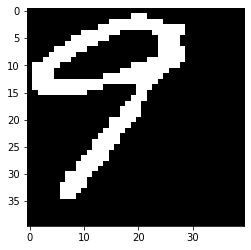

In [70]:
from PIL import Image

categories = [ "2", "4" , "7", "9"]

predictions = model.predict_classes(X_test)
for i,v in enumerate(predictions):
    predictions_ans = v.argmax()
    ans = y_test[i].argmax()
    dat = X_test[i]
    if ans == predictions_ans: continue
    fname = "NG_photo/" + str(i) + "-" + categories[predictions_ans] + \"-ne-" + categories[ans] + ".png"
    dat *= 255
    img = Image.fromarray(dat.reshape((28,28))).convert("RGB")
    img.save(fname)

SyntaxError: unexpected character after line continuation character (<ipython-input-70-3b4457d20e2d>, line 11)